In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [3]:
bc_df = pd.read_csv('../data/wisconsin_breast_cancer/data.csv')

In [4]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# 필요없는 컬럼 삭제 
bc_df.drop('Unnamed: 32', axis=1, inplace=True)
bc_df.drop('id', axis=1, inplace=True)

In [6]:
bc_df['diagnosis'] = bc_df['diagnosis'].map({'M':0, 'B':1}) # 벡터화

In [36]:
bc_df['diagnosis'].value_counts() # 데이터 분포 확인 

diagnosis
1    357
0    212
Name: count, dtype: int64

In [8]:
target = bc_df['diagnosis'] # 정답 분리 

In [9]:
mean_features = bc_df.columns[1:10]
se_features = bc_df.columns[10:20]
worst_features = bc_df.columns[21:]

In [10]:
print(mean_features)
print(se_features)
print(worst_features)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean'],
      dtype='object')
Index(['fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se'],
      dtype='object')
Index(['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [11]:
bc_df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: >

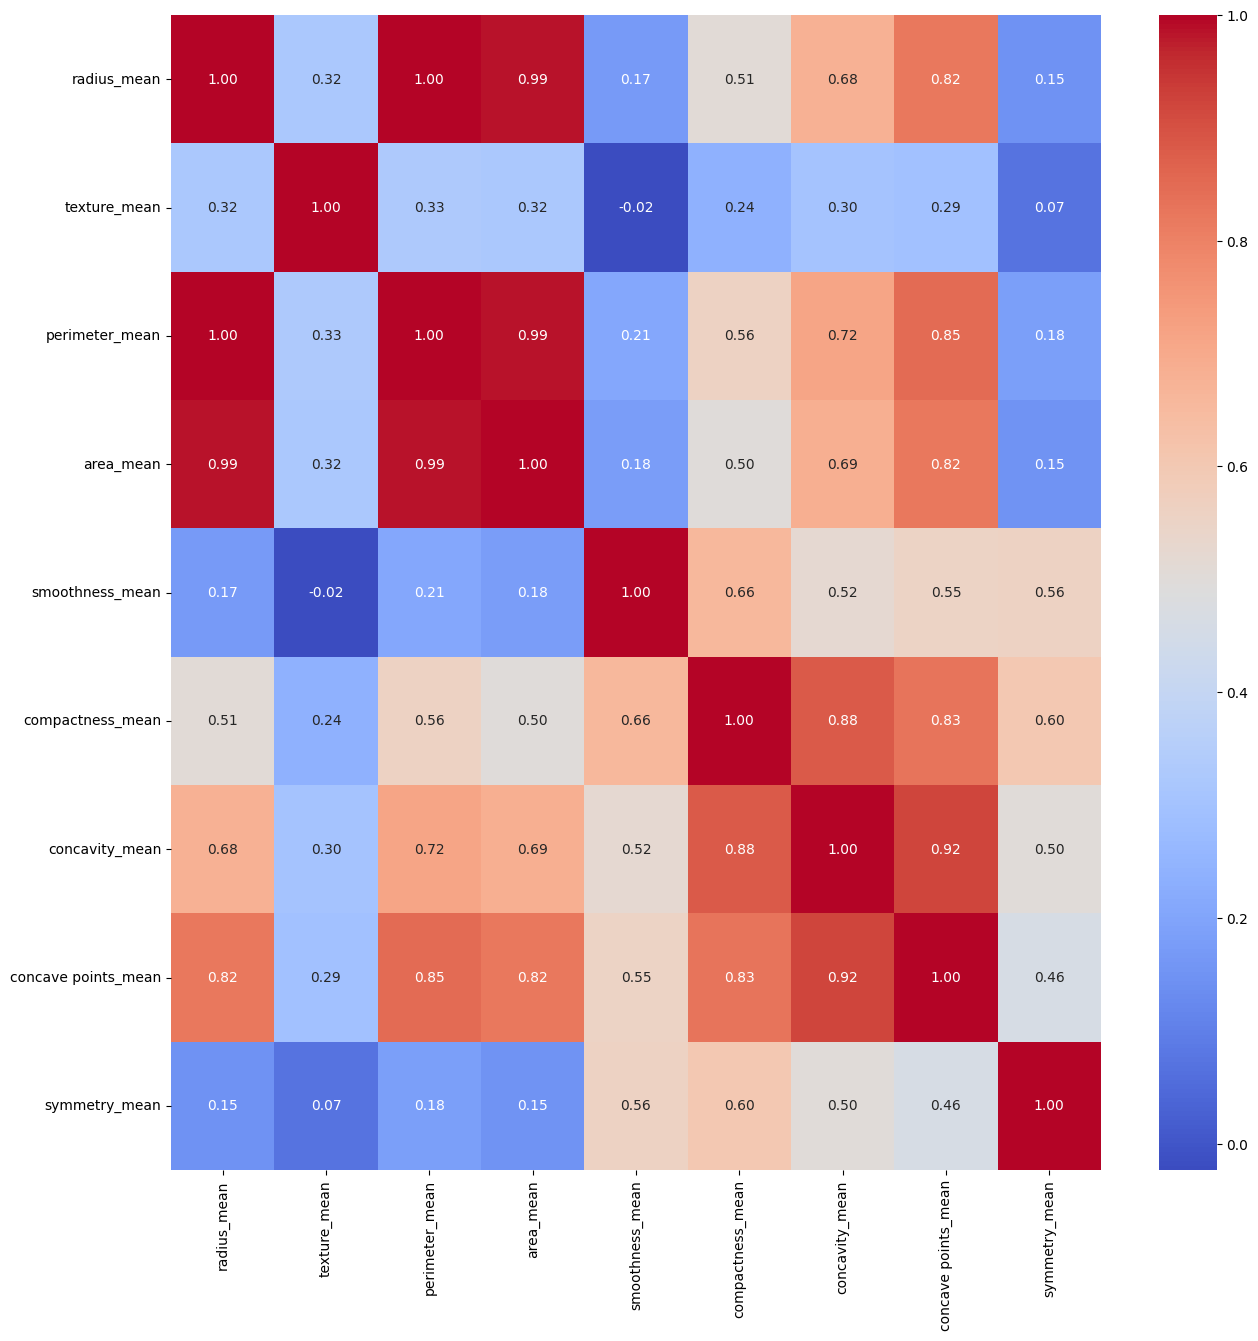

In [12]:
corr_mean = bc_df[mean_features].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_mean,cmap='coolwarm' ,annot=True, fmt='.2f')

<Axes: >

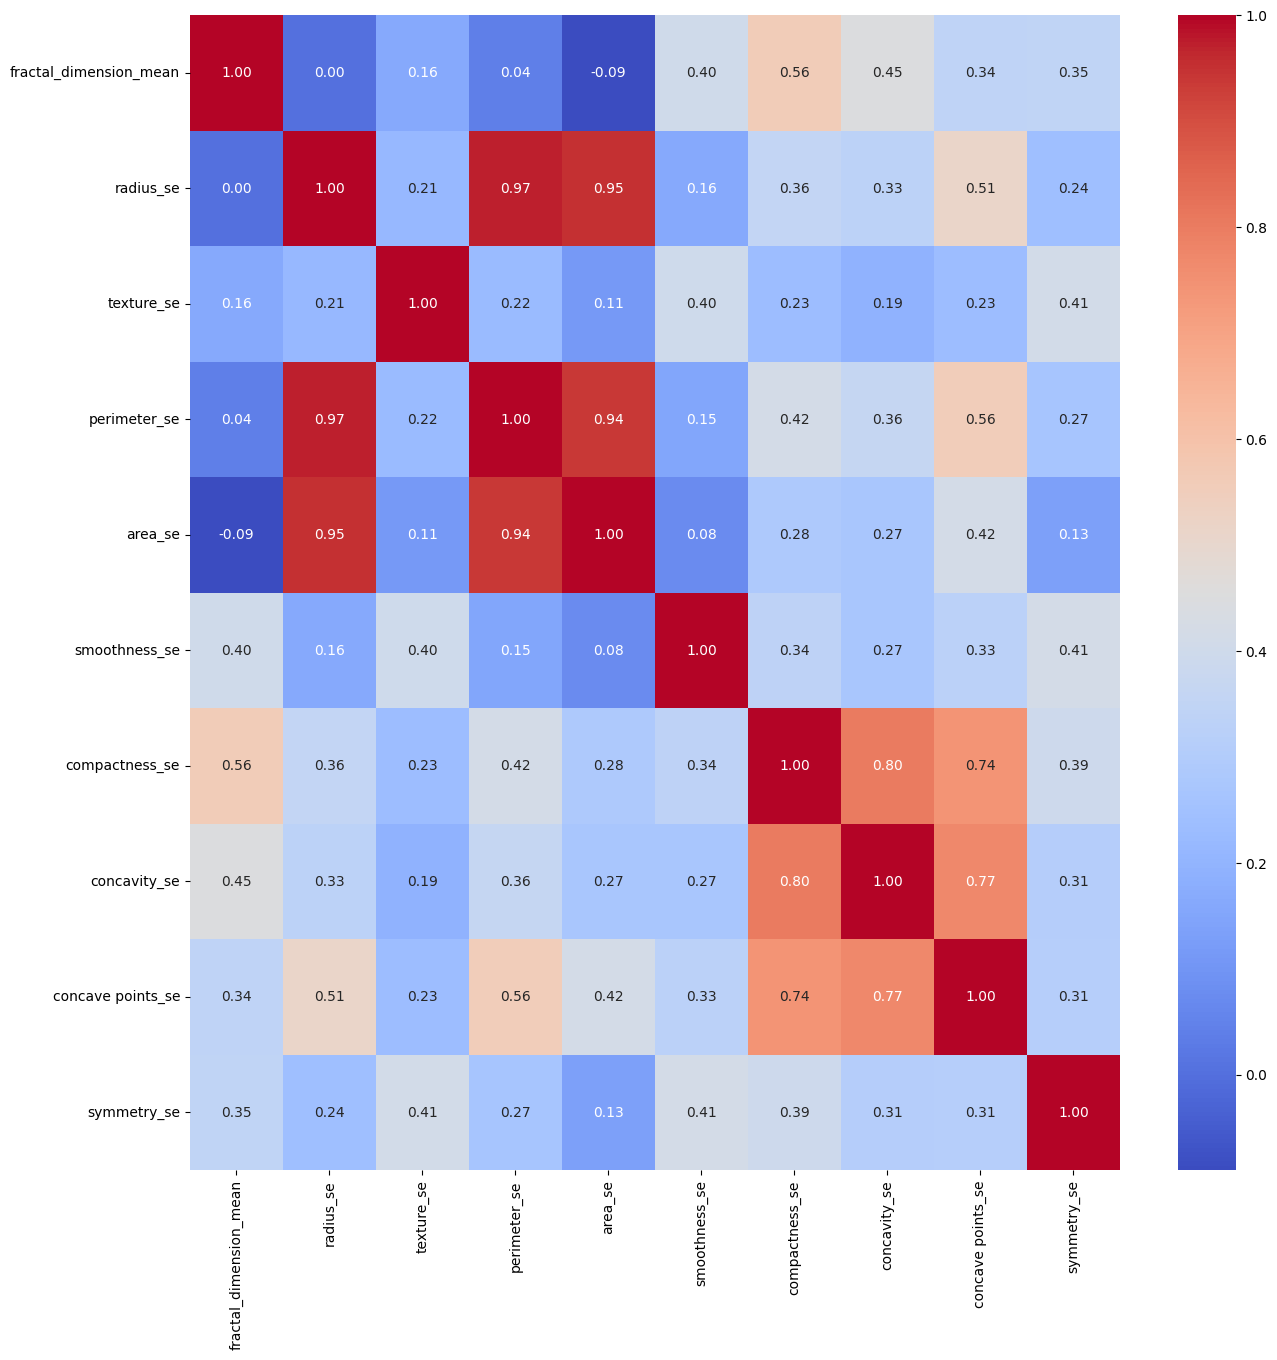

In [13]:
corr_se = bc_df[se_features].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_se,cmap='coolwarm' ,annot=True, fmt='.2f')

<Axes: >

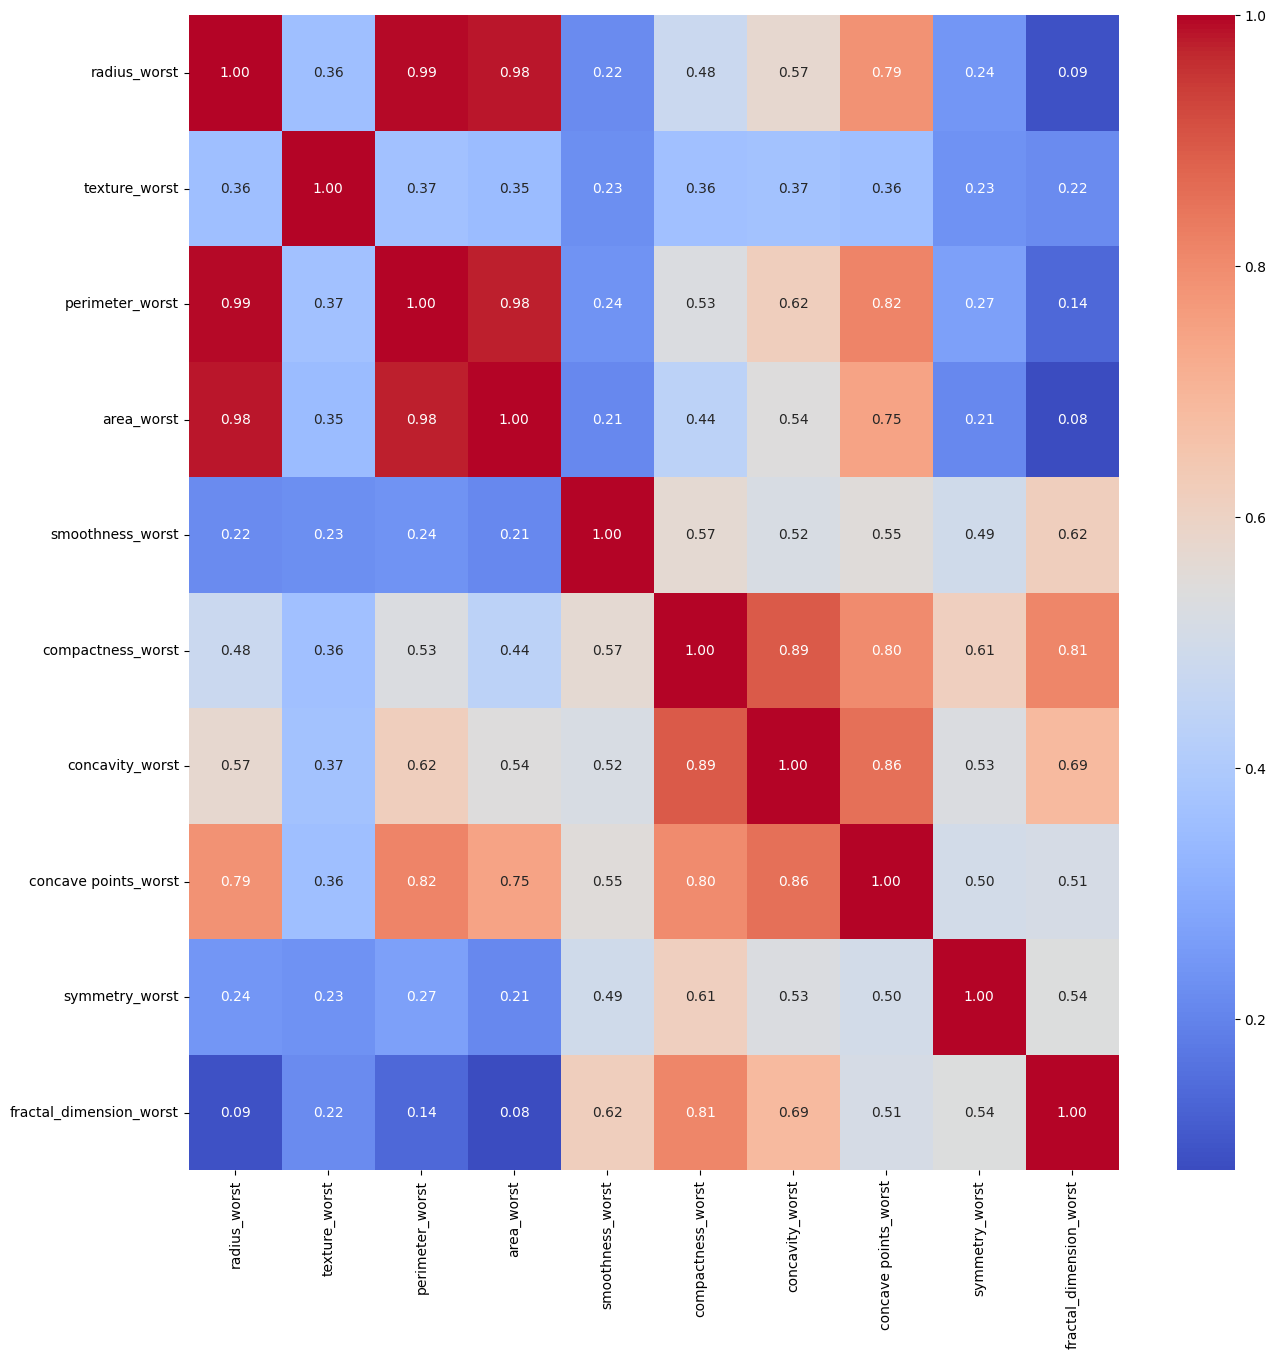

In [14]:
corr_worst = bc_df[worst_features].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_worst,cmap='coolwarm' ,annot=True, fmt='.2f')

In [15]:
train, test = train_test_split(bc_df, test_size=0.2)

In [16]:
X_train= train[worst_features]
y_train = train.diagnosis
X_test= test[worst_features]
y_test = test.diagnosis

In [17]:
br_lr = LogisticRegression("elasticnet", solver='saga', l1_ratio=0.5)
br_lr.fit(X_train, y_train)

c:\ProgramData\anaconda3\envs\ml-dev\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [18]:
br_rf = RandomForestClassifier(n_estimators=10000, max_depth=4, random_state=72)
br_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=10000, random_state=72)

In [19]:
pred_probas = br_lr.predict(X_test)
predictions = [1 if x > 0.4 else 0 for x in pred_probas]

In [20]:
print(pred_probas)
print(predictions)

[1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0
 1 1 0]
[1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0]


In [21]:
pred_proba = br_rf.predict(X_test)
predicts = [1 if x>0.4 else 0 for x in pred_proba]

In [22]:
print(pred_proba[:5])
print(predicts[:5])

[1 1 0 0 1]
[1, 1, 0, 0, 1]


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve
from sklearn.metrics import confusion_matrix, roc_curve

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1:{f1:.4f}, AUC:{roc_auc:.4f}')

In [24]:
get_clf_eval(y_test, predicts, pred_proba)

오차 행렬
[[36  1]
 [ 6 71]]
정확도: 0.9386, 정밀도: 0.9861, 재현율: 0.9221, F1:0.9530, AUC:0.9475


In [25]:
get_clf_eval(y_test, predictions, pred_probas)

오차 행렬
[[29  8]
 [ 5 72]]
정확도: 0.8860, 정밀도: 0.9000, 재현율: 0.9351, F1:0.9172, AUC:0.8594


In [26]:
from sklearn import svm
model = svm.SVC(kernel='sigmoid')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
acc=accuracy_score(y_test, predictions)


In [27]:
print(acc)

0.38596491228070173


In [28]:
import xgboost as xg
br_xgb = xg.XGBClassifier(n_estimators=10000, max_depth=4, random_state=72)
br_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10000, n_jobs=None,
              num_parallel_tree=None, random_state=72, ...)

In [29]:
predicts_xg = br_xgb.predict(X_test)
pred_proba_xg = [1 if x>0.4 else 0 for x in predicts_xg]

In [30]:
get_clf_eval(y_test, pred=pred_proba_xg, pred_proba=pred_proba_xg)

오차 행렬
[[37  0]
 [ 6 71]]
정확도: 0.9474, 정밀도: 1.0000, 재현율: 0.9221, F1:0.9595, AUC:0.9610
